# Data Science Capstone - Dev Gupta

This notebook will be used to submit my IBM Data Science Final Project!

#### Importing and processing

In [1]:
#importing mathamatical tools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing visualization tools
import pandas as pd
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
#downloading data set
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [5]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
#converting to pandas dataframe
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

#Check to see if its there
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#add a column for our target data, price.
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#check for missing values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### Understanding the data

<function matplotlib.pyplot.show(*args, **kw)>

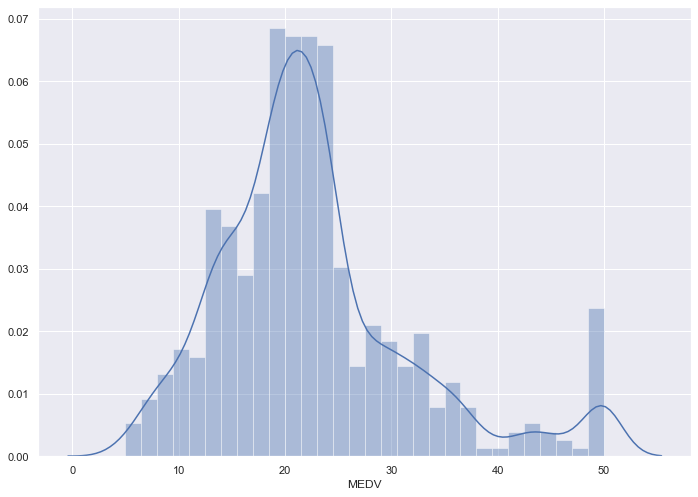

In [9]:
#Now making a figure that adds houses of the same value and displays them

#set figure size
sns.set(rc = {'figure.figsize':(11.7,8.27)})
#defining the plot as a histogram
sns.distplot(boston['MEDV'], bins = 30)
plt.show

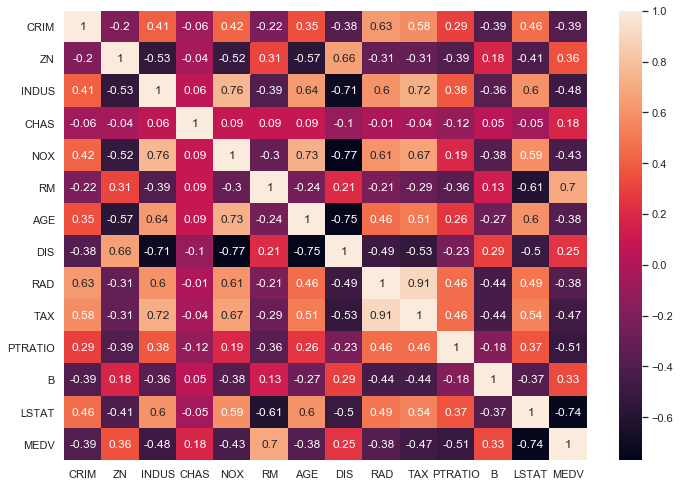

In [10]:
#now lets find the elements with highest correlation to price so we can use those to predict it

#computes correlation
correlation_matrix = boston.corr().round(2)
#makes a heatmap to visulaize the data
sns.heatmap(data =correlation_matrix, annot =True)

In [11]:
# MEDV is strongly correlated to LSTAT and RM
plt.figure(figsize= (20, 5))

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

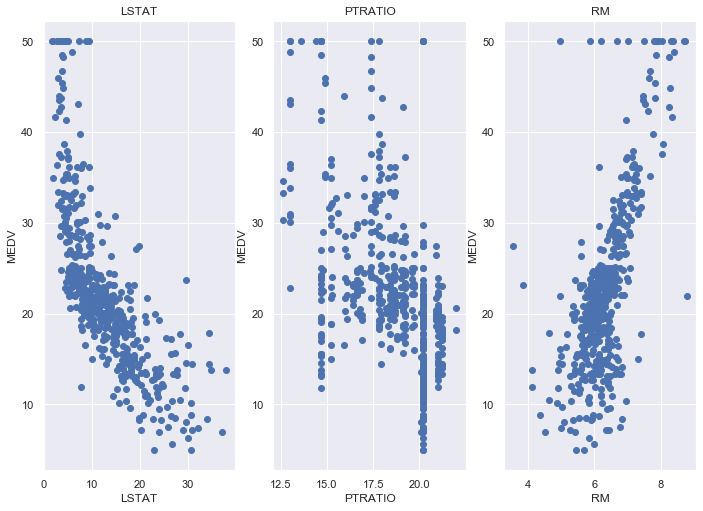

In [12]:
features  = {'LSTAT', 'RM', 'PTRATIO'}
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [13]:
# prepare data for training
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT', 'RM'])
Y = boston['MEDV']

In [14]:
#split data to test
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [16]:
#train using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [17]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
from sklearn.model_selection import train_test_split


# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954


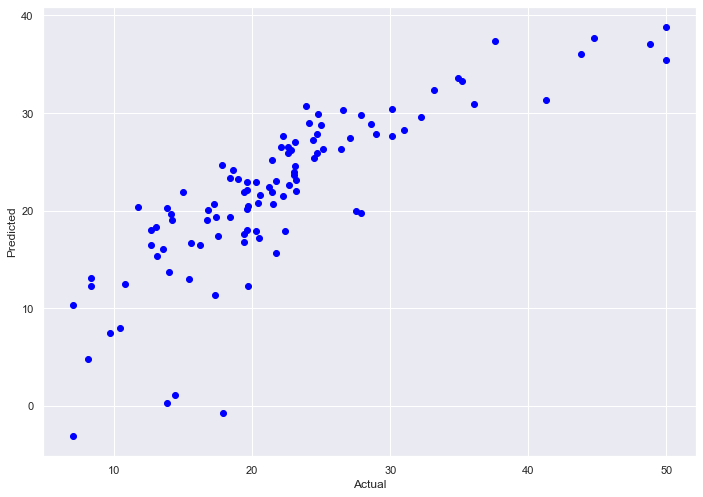

In [19]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

plt.scatter(Y_test, y_test_predict, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')


plt.show()

In [20]:
x_test_array = np.asarray( X_test)
x_test_array.shape

(102, 2)

In [21]:
rm = input("How many rooms are in your dwelling? ") 
lstat = input("What is the percentage of lower status poulation in the neigborhood? ")

How many rooms are in your dwelling? 4
What is the percentage of lower status poulation in the neigborhood? 3


In [22]:
rm = float(rm)
lstat = float(lstat)

In [23]:
lst = [rm , lstat]

In [24]:
lst_array = np.asarray(lst)
lst = lst_array.reshape((1,2))
print(lst.shape)
print(lst)

(1, 2)
[[4. 3.]]


In [25]:
user_predict = lin_model.predict(lst)

In [26]:
lin_model.coef_

array([-0.71722954,  4.58938833])

In [27]:
from mpl_toolkits import mplot3d
%matplotlib inline

In [28]:
output_final = (-0.71722954 * float(lstat) + 4.58938833 * float(rm))

In [29]:
x_test_LSTAT = X_test['LSTAT']
x_test_RM = X_test['RM']

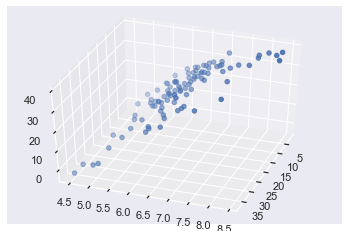

In [30]:
ax = plt.axes(projection='3d')

xdata = np.asarray(x_test_LSTAT)
ydata = np.asarray(x_test_RM)
zdata = np.asarray(y_test_predict)

ax.scatter3D(xdata, ydata, zdata, cmap='Greens')

ax.view_init(40, 20)

In [31]:
print(output_final)

16.2058647


In [32]:
print("house worth is:")
print(user_predict *10000)

house worth is:
[136354.87156967]


In [33]:
for i in range(10):
    input_features = X_test.iloc[i].values.reshape(1,2)
    pred_temp = lin_model.predict(input_features)[0]
    actual = Y_test.iloc[i]
    
    print('Features:\n', input_features, 
          '\nPrediction:', pred_temp, 
          '\nActual:', actual, '\n')

Features:
 [[3.13 8.04]] 
Prediction: 37.38999403450201 
Actual: 37.6 

Features:
 [[4.7  6.63]] 
Prediction: 29.79290610929409 
Actual: 27.9 

Features:
 [[8.81  6.417]] 
Prediction: 25.867552974668143 
Actual: 22.6 

Features:
 [[34.77   4.906]] 
Prediction: 0.3137082808213769 
Actual: 13.8 

Features:
 [[6.58  7.691]] 
Prediction: 33.313855585417315 
Actual: 35.2 

Features:
 [[26.64   5.304]] 
Prediction: 7.971361018030155 
Actual: 10.4 

Features:
 [[5.64  6.976]] 
Prediction: 30.70663870075809 
Actual: 23.9 

Features:
 [[8.05  6.726]] 
Prediction: 27.830768420640396 
Actual: 29.0 

Features:
 [[10.16   6.715]] 
Prediction: 26.26693081384288 
Actual: 22.8 

Features:
 [[14.36   6.437]] 
Prediction: 21.978716779021443 
Actual: 23.2 

